# Analise modelos ML

## Carregar dados tratados

In [28]:
# ! pip install seaborn
# ! pip install plotly
# ! pip install statsmodels
# ! pip install sklearn

In [46]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

import joblib

In [30]:
def carregar_joblib(file_name: str = "../out/result_analise_desc.joblib"):
    df = joblib.load(file_name)
    return df

In [31]:
def split_dados(df):
    X = df.drop(["decisao"], axis=1)
    y = df["decisao"]

    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

    print(f"{len(X_treino)=} {len(X_teste)=} {len(y_treino)=} {len(y_teste)=}")

    return X_treino, X_teste, y_treino, y_teste

In [32]:
def avaliar(y_teste, previsoes, nome_modelo):
    print(nome_modelo)
    print("Reporte teste")
    report = classification_report(y_teste, previsoes)
    print(report)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index=["Vender", "Comprar"], columns=["Vender", "Comprar"])
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt=',')
    plt.show()
    print("#" * 50)
    
    


# ML modelos

## Modelos a serem testados

- Random Forest
- Gradient Boost
- K Nearest Neighbors (KNN)

In [79]:
def definir_modelos_ml() -> dict:
    return {
        "RandomForest_base": RandomForestClassifier(random_state=42),
        "RandomForest_tunned": RandomForestClassifier(random_state=42, n_estimators= 1400, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 80, bootstrap= True),
        "RandomForest_tunned_grid": RandomForestClassifier(random_state=42, n_estimators= 200, min_samples_split= 12, min_samples_leaf= 3, max_features= 'sqrt', max_depth= 80, bootstrap= True),
        "GradientBoost": GradientBoostingClassifier(random_state=1),
        "GradientBoost_tunned": GradientBoostingClassifier(random_state=42, n_estimators= 1411, min_samples_split= 2, min_samples_leaf= 2, max_features= "auto", max_depth= 110, learning_rate= 0.025, criterion= "squared_error"),
        "NN_tunned": MLPClassifier(solver= "sgd", random_state= 2, hidden_layer_sizes= 5, alpha= 0.1, activation= "relu"),
    }

In [80]:
def rodar_imprimir_modelos_ml(modelos, X_treino, X_teste, y_treino, y_teste):
    for nome_modelo in modelos:
        modelo = modelos[nome_modelo]
        modelo.fit(X_treino, y_treino)
        previsoes = modelo.predict(X_teste)
        avaliar(y_teste, previsoes, nome_modelo)
        modelos[nome_modelo] = modelo
    
    return modelos

# Execucao

In [81]:
def main(scaled: bool = False):
    if scaled:
        df = carregar_joblib("../out/result_analise_desc_scaled.joblib")
        print("scaled df")
    else:
        df = carregar_joblib()
        print("NOT scaled df")

    print(df.shape)

    # split database train and test
    X_treino, X_teste, y_treino, y_teste = split_dados(df)

    modelos = definir_modelos_ml()

    modelos = rodar_imprimir_modelos_ml(modelos, X_treino, X_teste, y_treino, y_teste)

    return df


NOT scaled df
(1667, 7)
len(X_treino)=1166 len(X_teste)=501 len(y_treino)=1166 len(y_teste)=501
RandomForest_base
Reporte teste
              precision    recall  f1-score   support

           0       0.54      0.56      0.55       250
           1       0.55      0.53      0.54       251

    accuracy                           0.54       501
   macro avg       0.54      0.54      0.54       501
weighted avg       0.54      0.54      0.54       501



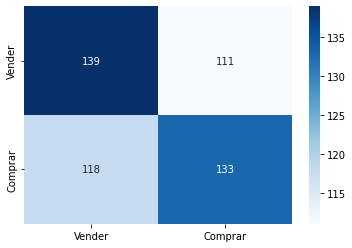

##################################################
RandomForest_tunned
Reporte teste
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       250
           1       0.54      0.55      0.55       251

    accuracy                           0.54       501
   macro avg       0.54      0.54      0.54       501
weighted avg       0.54      0.54      0.54       501



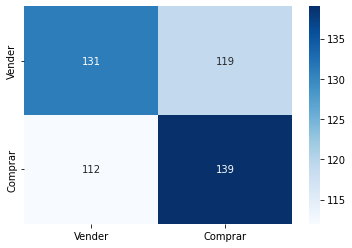

##################################################
RandomForest_tunned_grid
Reporte teste
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       250
           1       0.55      0.55      0.55       251

    accuracy                           0.55       501
   macro avg       0.55      0.55      0.55       501
weighted avg       0.55      0.55      0.55       501



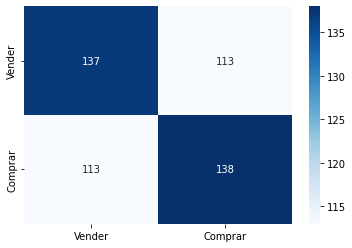

##################################################
GradientBoost
Reporte teste
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       250
           1       0.52      0.52      0.52       251

    accuracy                           0.51       501
   macro avg       0.51      0.51      0.51       501
weighted avg       0.51      0.51      0.51       501



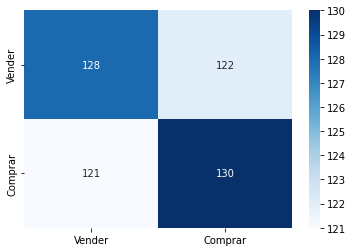

##################################################
GradientBoost_tunned
Reporte teste
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       250
           1       0.54      0.55      0.55       251

    accuracy                           0.54       501
   macro avg       0.54      0.54      0.54       501
weighted avg       0.54      0.54      0.54       501



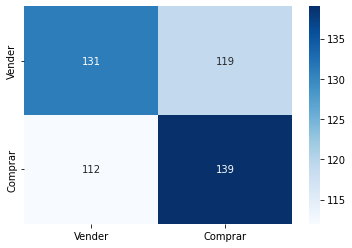

##################################################
NN
Reporte teste
              precision    recall  f1-score   support

           0       0.54      0.41      0.46       250
           1       0.53      0.65      0.58       251

    accuracy                           0.53       501
   macro avg       0.53      0.53      0.52       501
weighted avg       0.53      0.53      0.52       501



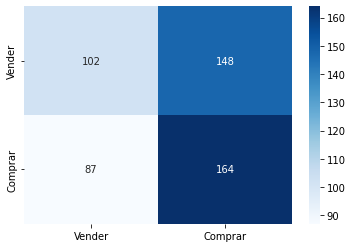

##################################################


In [82]:
df = main(scaled=False)

## Em comparacao entre dados com tratamento de standardScaler e sem, notou-se uma precisao melhor quando os dados nao estao com scaler para KNN e Rede Neural.

## Escolha de 3 melhores modelos para comparação

In [37]:
import numpy as np
def fit_tunning_grid_gradient_boost(X_treino, y_treino):

    n_estimators = range(100, 300, 100)
    max_features = list(range(1, 7))
    max_features = [4,5,7]
    max_features = ["auto", "sqrt", "log2"]
    # max_features.append("auto")

    precision2_score = make_scorer(precision_score, labels=[2], average='macro')
    parameters = {
        "loss":["deviance"],
        "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
        "min_samples_split": [0.05, 0.1, 0.2], #np.linspace(0.05, 0.1, 0.2),
        "min_samples_leaf": [0.05, 0.1, 0.2], #np.linspace(0.05, 0.1, 0.2),
        "max_depth":[3],
        "max_features":["log2", "sqrt"],
        "criterion": ["mae"],
        # "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
        "n_estimators":[7]
        }
    grid = GridSearchCV(
            estimator=GradientBoostingClassifier(random_state=1),
            param_grid=parameters,
            scoring=precision2_score,
            refit=False,cv=10, n_jobs=-1
    )

    return grid.fit(X_treino, y_treino)   

In [52]:

def fit_tunning_grid_random_forest(X_treino, y_treino):
    print("Tunning Random Forest")
    # n_estimators = range(100, 300, 100)
    # max_features = list(range(2, 7, 2))
    # max_features.append('auto')
    max_features = ['auto', 'log2', 'sqrt']
    min_samples_split = range(2, 7, 2)

    # precision2_score = make_scorer(precision_score, labels=[2], average='macro')
    precision2_score = make_scorer(precision_score)

    grid = GridSearchCV(
            estimator=RandomForestClassifier(random_state=1),
            param_grid={
                'n_estimators': [100],
                'max_features': max_features,
                'min_samples_split': min_samples_split,
                'random_state': [1],
            },
            cv=5,
            scoring=precision2_score,
    )

    return grid.fit(X_treino, y_treino)

In [39]:
def run_gradient_boost_tunning(df):
    # split database train and test
    X_treino, X_teste, y_treino, y_teste = split_dados(df)
    resultado_grid = fit_tunning_grid_gradient_boost(X_treino, y_treino)

    print("Ajuste Gradient feito")

    print("Best params", resultado_grid.best_params_)
    print("Best score", resultado_grid.best_score_)

In [40]:
def run_random_forest_tunning(df):
    # split database train and test
    X_treino, X_teste, y_treino, y_teste = split_dados(df)
    resultado_grid = fit_tunning_grid_random_forest(X_treino, y_treino)

    print("Ajuste random forest feito")

    print("best params", resultado_grid.best_params_)
    modelo_tunado = resultado_grid.best_estimator_
    previsoes = modelo_tunado.predict(X_teste)

    avaliar(y_teste, previsoes, "RandomForest Tunado")

len(X_treino)=1166 len(X_teste)=501 len(y_treino)=1166 len(y_teste)=501
Tunning Random Forest
Ajuste random forest feito
best params {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}
RandomForest Tunado
Reporte teste
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       250
           1       0.54      0.55      0.54       251

    accuracy                           0.54       501
   macro avg       0.54      0.54      0.54       501
weighted avg       0.54      0.54      0.54       501



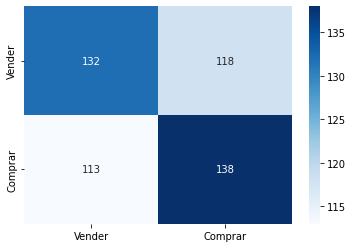

##################################################


In [53]:
def main_tunning(df):

    # run_gradient_boost_tunning(df)
    run_random_forest_tunning(df)

main_tunning(df)

/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1280: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterio

gradient boost tunned
Reporte teste
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       250
           1       0.52      0.56      0.54       251

    accuracy                           0.52       501
   macro avg       0.52      0.52      0.52       501
weighted avg       0.52      0.52      0.52       501



/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


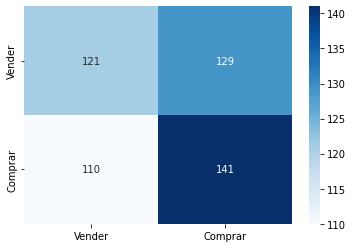

##################################################


In [42]:
# modelo = GradientBoostingClassifier(min_samples_split=0.1,
#                                      min_samples_leaf=0.1, 
#                                      learning_rate=0.025, 
#                                      max_depth=5, 
#                                      max_features="sqrt",
#                                      criterion="friedman_mse",
#                                      random_state=1)

# modelo = GradientBoostingClassifier(min_samples_split=0.05,
#                                      min_samples_leaf=0.05, 
#                                      learning_rate=0.1, 
#                                      max_depth=3, 
#                                      max_features="sqrt",
#                                      criterion="mae",
#                                      random_state=1)

modelo = GradientBoostingClassifier(min_samples_split=0.05,
                                     min_samples_leaf=0.05, 
                                     learning_rate=0.01, 
                                     max_depth=3, 
                                     max_features="log2",
                                     criterion="mae",
                                     random_state=1)

modelo.fit(X_treino, y_treino)
previsoes = modelo.predict(X_teste)
avaliar(y_teste, previsoes, "gradient boost tunned")

